Football Stats Profile Notebook
===

## Glossary
Principal Component Variation = Read as "Hou much (%) of the data this principal component can explain"

In [80]:
from itertools import accumulate

import matplotlib.pyplot as plt  # We will use this package to plot some data
import numpy as np
import pandas  # Library to make it eay to manipulate data in python
from sklearn import preprocessing  # This packages give us functions to scaling the data before performing PCA
from sklearn.decomposition import PCA  # PCA function from Scikit Learn


## Reading

In [81]:
STATS_FILE = "resources/brasileirao_2020_stats_part.csv"
METRICS = [
    "touches",
    "passes_def",
    "passes_mid",
    "passes_att",
    "passes_forward",
    "passes_backward",
    "passes_left",
    "passes_right",
    "passes_long",
    "passes_short",
    "crosses",
    "shots",
    # "possession"
]

data = pandas.read_csv(STATS_FILE, sep=";", index_col=0).filter(METRICS, axis=1)
print(f'Data sneak peak:\n {data.head()}')
print(f'Data shape: {data.shape}')

Data sneak peak:
                       touches  passes_def  passes_mid  passes_att  \
Gremio                    688          76         336         165   
Santos                    459          91         154         104   
Fortaleza                 544          93         243         115   
Athletico_Paranaense      682         181         294         104   
Coritiba                  564          87         241          88   

                      passes_forward  passes_backward  passes_left  \
Gremio                           332              242          291   
Santos                           217              131          161   
Fortaleza                        253              197          233   
Athletico_Paranaense             324              253          294   
Coritiba                         295              117          202   

                      passes_right  passes_long  passes_short  crosses  shots  
Gremio                         285           35           542     

## Pre Processing

Before performing PCA we need to center and scale the data.

After centering the average value for each metric will be 0.

And after scaling, the standard deviation for the value for each metric will be 1

In [82]:
scaled_data = preprocessing.scale(data)

## Apply PCA

In [83]:
pca = PCA()
pca.fit(
    scaled_data)  # This is where we do all the PCA math (i.e calculate loading scores and the variation each principal component accounts for)
pca_data = pca.transform(
    scaled_data)  # This is where we generate coordinates for the PCA graph (based on the loading score and the scaled data)

## Principal Component Variation Graph

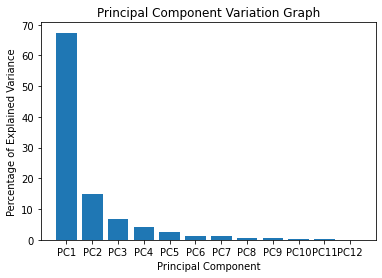

In [84]:
per_var = np.round(pca.explained_variance_ratio_ * 100,
                   decimals=1)  # Calculate the percentage variation that each PC accounts for
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]  # Creating labels for our graph
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Principal Component Variation Graph')
plt.show()

## Principal Component Filtering
Now we are going to save all the components that account for at least 85% of the data variance.

In other words: We are going to keep just the styles of playing that appears on at least 85% of the matches.
We are doing this because we are not interested in styles of play that appeared just a few times.

In [85]:
min_grouped_variation = 85
components = 0
sum = 0
per_var.sort()
per_var_reversed = per_var[::-1]
for pca_variation in per_var_reversed:
    sum += pca_variation
    components += 1
    if (sum >= min_grouped_variation):
        break
print(f'The first {components} accounts for {sum}% of the data variation')

The first 3 accounts for 89.30000000000001% of the data variation


In [86]:
for component in range(0, components):
    loading_scores = pandas.Series(pca.components_[component], index=METRICS)
    sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
    values = sorted_loading_scores.index.values

    n_component = 0
    index = 0
    for x in accumulate(sorted_loading_scores):
        index += 1
        if abs(x) >= 0.9:
            n_component = index
            break

    print(n_component)
    print(f'This are the the main loading scores for component {component}')
    print(loading_scores[values][0:n_component])

3
This are the the main loading scores for component 0
passes_right      0.342657
passes_short      0.342518
passes_forward    0.340594
dtype: float64
2
This are the the main loading scores for component 1
passes_def   -0.594101
shots         0.398918
dtype: float64
2
This are the the main loading scores for component 2
passes_long    0.840482
crosses        0.355017
dtype: float64
